### __7) Dense network__ 


Finally, try with neural networks
- 1-layer dense network i.e. no hidden layer, just the input and output ones
- 2-layer dense network i.e. one hidden layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import plot_model

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
from tensorflow.keras.utils import to_categorical   

Using TensorFlow backend.


In [2]:
data_dir = 'C:/Users/tgdreju4/OneDrive - Swisscom/EPFL/Notebooks/04ML/swissroads/'
my_dir = data_dir + 'test/'

In [3]:
with np.load(data_dir + 'train.npz', allow_pickle=False) as npz_file:
    X_tr   = npz_file['features']
    y_tr   = npz_file['labels']
    train_data = dict(npz_file.items())

    
with np.load(data_dir + 'test.npz', allow_pickle=False) as npz_file:
    X_te = npz_file['features']
    y_te   = npz_file['labels']    
    test_data = dict(npz_file.items())
    
with np.load(data_dir + 'valid.npz', allow_pickle=False) as npz_file:
    X_va = npz_file['features']
    y_va   = npz_file['labels']    
    valid_data = dict(npz_file.items())    

# Create X/y arrays
X_tr = train_data['features']
X_te = test_data['features']
X_va = valid_data['features']
y_tr = train_data['labels']
y_te = test_data['labels']
y_va = valid_data['labels']
z_tr = train_data['files']
z_te = test_data['files']



In [4]:
# Beispiel https://www.tensorflow.org/tutorials/load_data/numpy
train_dataset = tf.data.Dataset.from_tensor_slices((X_tr, y_tr))
test_dataset  = tf.data.Dataset.from_tensor_slices((X_te, y_te))
valid_dataset  = tf.data.Dataset.from_tensor_slices((X_va, y_va))
print(train_dataset)

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset  = test_dataset.batch(BATCH_SIZE)
valid_dataset  = valid_dataset.batch(BATCH_SIZE)

<TensorSliceDataset shapes: ((2048,), ()), types: (tf.float32, tf.int32)>


In [5]:
epoch_val = 60

In [6]:
# End training when accuracy stops improving (optional)
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=6)

#### 1-layer dense network

In [7]:
# 1 Layer very simple model

model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2048,),name='input'), 
        tf.keras.layers.Dense(6, activation='softmax',name='output') ])
 
model.build()

model.compile(#optimizer=tf.keras.optimizers.RMSprop(),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              #optimizer= "adam",
              loss='categorical_crossentropy',    
              #metrics=[tf.keras.metrics.Accuracy()]
              #metrics=['sparse_categorical_accuracy'] 
              metrics=['accuracy']
             )

history=model.fit(X_tr, 
                  to_categorical(y_tr, num_classes=None, dtype='float32'),
                  epochs=epoch_val ,
                  batch_size=BATCH_SIZE,
                  callbacks=[early_stopping],
                  validation_data=(X_va,  to_categorical(y_va, num_classes=None, dtype='float32')),
                  verbose=2 # verbose=0 will show nothing (silent) )
                          )   



Train on 280 samples, validate on 139 samples
Epoch 1/60
280/280 - 1s - loss: 1.8013 - accuracy: 0.2786 - val_loss: 1.3163 - val_accuracy: 0.5827
Epoch 2/60
280/280 - 0s - loss: 1.2493 - accuracy: 0.6321 - val_loss: 0.9160 - val_accuracy: 0.8058
Epoch 3/60
280/280 - 0s - loss: 0.8669 - accuracy: 0.7857 - val_loss: 0.6723 - val_accuracy: 0.8273
Epoch 4/60
280/280 - 0s - loss: 0.6497 - accuracy: 0.8250 - val_loss: 0.5327 - val_accuracy: 0.8849
Epoch 5/60
280/280 - 0s - loss: 0.4992 - accuracy: 0.8786 - val_loss: 0.4487 - val_accuracy: 0.9137
Epoch 6/60
280/280 - 0s - loss: 0.4119 - accuracy: 0.8929 - val_loss: 0.3952 - val_accuracy: 0.8993
Epoch 7/60
280/280 - 0s - loss: 0.3501 - accuracy: 0.9321 - val_loss: 0.3643 - val_accuracy: 0.9065
Epoch 8/60
280/280 - 0s - loss: 0.3111 - accuracy: 0.9393 - val_loss: 0.3387 - val_accuracy: 0.9209
Epoch 9/60
280/280 - 0s - loss: 0.2820 - accuracy: 0.9500 - val_loss: 0.3281 - val_accuracy: 0.8993
Epoch 10/60
280/280 - 0s - loss: 0.2540 - accuracy: 0.

In [8]:
one_layer_nn = max(history.history['val_accuracy'])
one_layer_nn

0.92086333

Text(0, 0.5, 'loss')

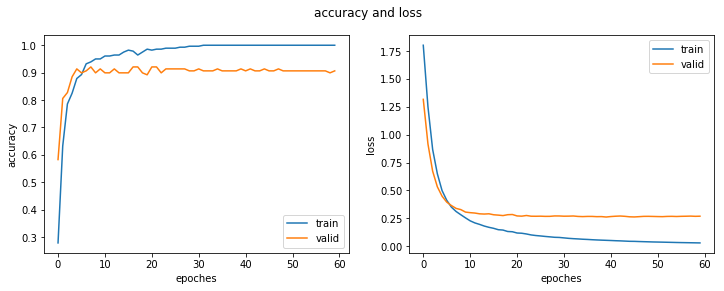

In [9]:
# summarize history for accuracy
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('accuracy and loss')
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('epoches')
ax1.set_ylabel('accuracy')

ax1.legend(['train', 'valid'], loc='best')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.legend(['train', 'valid'], loc='best')
ax2.set_xlabel('epoches')
ax2.set_ylabel('loss')

__Result:__
> The validation loss and accuracy is improving until epoch=10 and is then reachning a plateau.

#### __2 layer network__
Add one hidden layer and rerun the model

In [10]:
model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2048,),name='input'),
        tf.keras.layers.Dense(128), 
        tf.keras.layers.Dense(64),    
        tf.keras.layers.Dense(6, activation='softmax',name='output') ])

model.build()

model.compile(#optimizer=tf.keras.optimizers.RMSprop(),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #optimizer=tf.keras.optimizers.Adam(),
              optimizer= "adam",
              loss='categorical_crossentropy',    
              #metrics=[tf.keras.metrics.Accuracy()]
              #metrics=['sparse_categorical_accuracy'] 
              metrics=['accuracy']
             )

history=model.fit(X_tr, 
                  to_categorical(y_tr, num_classes=None, dtype='float32'),
                  epochs=epoch_val ,
                  batch_size=BATCH_SIZE,
                  callbacks=[early_stopping],
                  validation_data=(X_va,  to_categorical(y_va, num_classes=None, dtype='float32')),
                  verbose=1 # verbose=0 will show nothing (silent) )
                          )   



Train on 280 samples, validate on 139 samples
Epoch 1/60
280/280 [==============================] - 1s 2ms/sample - loss: 2.4400 - accuracy: 0.3714 - val_loss: 0.6948 - val_accuracy: 0.8058
Epoch 2/60
280/280 [==============================] - 0s 100us/sample - loss: 0.9018 - accuracy: 0.7714 - val_loss: 0.6577 - val_accuracy: 0.7626
Epoch 3/60
280/280 [==============================] - 0s 118us/sample - loss: 0.3370 - accuracy: 0.8643 - val_loss: 0.5773 - val_accuracy: 0.7914
Epoch 4/60
280/280 [==============================] - 0s 100us/sample - loss: 0.5364 - accuracy: 0.8464 - val_loss: 0.3875 - val_accuracy: 0.8633
Epoch 5/60
280/280 [==============================] - 0s 139us/sample - loss: 0.2412 - accuracy: 0.9107 - val_loss: 0.3200 - val_accuracy: 0.8849
Epoch 6/60
280/280 [==============================] - 0s 114us/sample - loss: 0.2136 - accuracy: 0.9214 - val_loss: 0.3089 - val_accuracy: 0.9065
Epoch 7/60
280/280 [==============================] - 0s 118us/sample - loss: 0.

In [11]:
two_layer_nn = max(history.history['val_accuracy'])
two_layer_nn

0.92805755

Text(0, 0.5, 'loss')

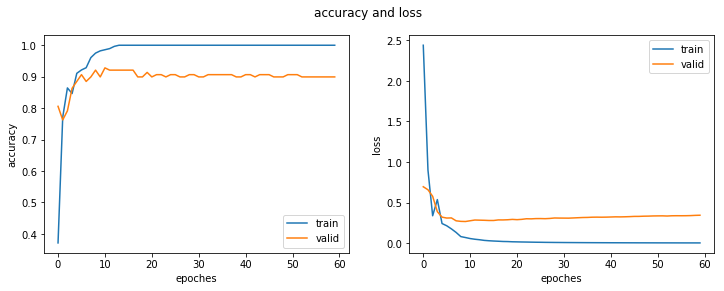

In [12]:
# summarize history for accuracy
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('accuracy and loss')
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('epoches')
ax1.set_ylabel('accuracy')

ax1.legend(['train', 'valid'], loc='best')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.legend(['train', 'valid'], loc='best')
ax2.set_xlabel('epoches')
ax2.set_ylabel('loss')

#### __Results__

In [13]:
# Load the csv file
df = pd.read_csv(data_dir + 'data.csv', index_col=0)
df = df.append({
       'model':         '1-layer nn',
       'test accuracy': one_layer_nn
            },ignore_index=True)  
df = df.append({
       'model':         '2-layer nn',
       'test accuracy': two_layer_nn
            },ignore_index=True)  

df.to_csv(data_dir + 'data.csv')
# read all results from csv and print 
df = pd.read_csv(data_dir + 'data.csv', index_col=0)
df

,model,test accuracy
0,knn,0.840000
1,decision tree,0.900000
2,Logistic,0.940000
3,smv linear,0.940000
4,smv rbf,0.940000
5,random forest,0.940000
6,1-layer nn,0.920863
7,2-layer nn,0.928058
